In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df = pd.read_csv('cloudburst.csv')

In [3]:
print(df.shape)
print(df.columns.to_list())

(145460, 23)
['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'CloudBurst Today', 'CloudBurstTomorrow']


In [4]:
print(df.head())

         Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  01-12-2008   Albury     13.4     22.9       0.6          NaN       NaN   
1  02-12-2008   Albury      7.4     25.1       0.0          NaN       NaN   
2  03-12-2008   Albury     12.9     25.7       0.0          NaN       NaN   
3  04-12-2008   Albury      9.2     28.0       0.0          NaN       NaN   
4  05-12-2008   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
0       1007.7       1007.1  

In [5]:
print(df.isnull().sum())

Date                      0
Location                  0
MinTemp                1485
MaxTemp                1261
Rainfall               3261
Evaporation           62790
Sunshine              69835
WindGustDir           10326
WindGustSpeed         10263
WindDir9am            10566
WindDir3pm             4228
WindSpeed9am           1767
WindSpeed3pm           3062
Humidity9am            2654
Humidity3pm            4507
Pressure9am           15065
Pressure3pm           15028
Cloud9am              55888
Cloud3pm              59358
Temp9am                1767
Temp3pm                3609
CloudBurst Today       3261
CloudBurstTomorrow     3267
dtype: int64


In [6]:
print(df['CloudBurst Today'].value_counts())
print(df['CloudBurstTomorrow'].value_counts())

CloudBurst Today
No     110319
Yes     31880
Name: count, dtype: int64
CloudBurstTomorrow
No     110316
Yes     31877
Name: count, dtype: int64


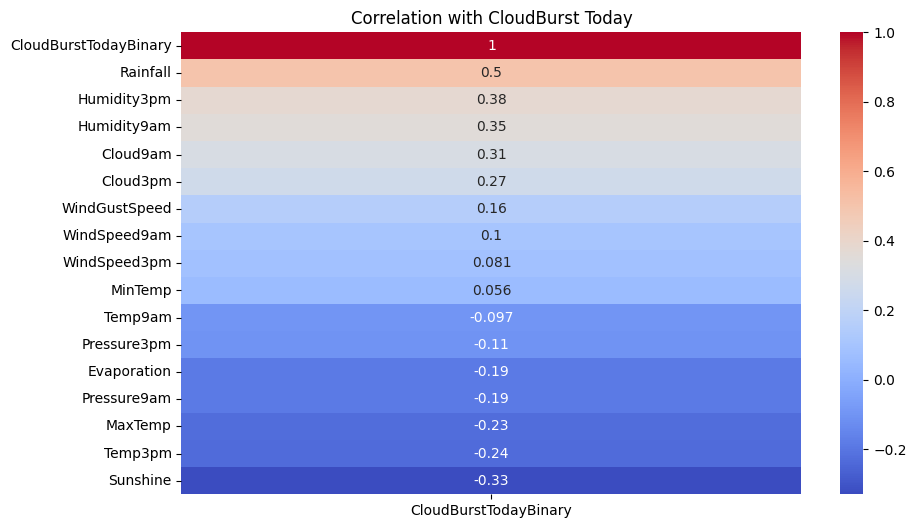

In [7]:
df['CloudBurstTodayBinary'] = df['CloudBurst Today'].map({'Yes': 1, 'No': 0})
numeric_features = df.select_dtypes(include=['float64', 'int64']).columns
corr_matrix = df[numeric_features].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix[['CloudBurstTodayBinary']].sort_values(by='CloudBurstTodayBinary', ascending=False), annot=True, cmap='coolwarm')
plt.title('Correlation with CloudBurst Today')
plt.show()

In [9]:
df['CloudBurst Today'] = df['CloudBurst Today'].map({'Yes': 1, 'No': 0})
df['CloudBurstTomorrow'] = df['CloudBurstTomorrow'].map({'Yes': 1, 'No': 0})

df = df.dropna(subset=['CloudBurst Today'])

In [10]:
numeric_features = [
    'MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine',
    'WindGustSpeed','WindSpeed9am','WindSpeed3pm',
    'Humidity9am','Humidity3pm','Pressure9am','Pressure3pm',
    'Cloud9am','Cloud3pm','Temp9am','Temp3pm'
]

categorical_features = [
    'Location','WindGustDir','WindDir9am','WindDir3pm','CloudBurstTomorrow'
]

target = 'CloudBurst Today'

In [324]:
print(df['Cloud9am'].value_counts())
print('\n')
print(df['Cloud3pm'].value_counts())

Cloud9am
7.0    19972
1.0    15687
8.0    14697
0.0     8642
6.0     8171
2.0     6500
3.0     5914
5.0     5567
4.0     4420
9.0        2
Name: count, dtype: int64


Cloud3pm
7.0    18229
1.0    14976
8.0    12660
6.0     8978
2.0     7226
3.0     6921
5.0     6815
4.0     5322
0.0     4974
9.0        1
Name: count, dtype: int64


In [326]:
print(df['Location'].value_counts())

Location
Canberra            3436
Sydney              3344
Adelaide            3193
Darwin              3193
Hobart              3193
Perth               3193
Melbourne           3193
Brisbane            3193
Albury              3040
MountGinini         3040
GoldCoast           3040
Wollongong          3040
MountGambier        3040
Launceston          3040
AliceSprings        3040
Albany              3040
Townsville          3040
Bendigo             3040
Cairns              3040
Ballarat            3040
Penrith             3039
Newcastle           3039
Tuggeranong         3039
PerthAirport        3009
Williamtown         3009
Cobar               3009
BadgerysCreek       3009
SydneyAirport       3009
Richmond            3009
Moree               3009
CoffsHarbour        3009
NorfolkIsland       3009
WaggaWagga          3009
Witchcliffe         3009
Watsonia            3009
Dartmoor            3009
Portland            3009
Sale                3009
MelbourneAirport    3009
Mildura         

In [327]:
# need to start grouping of locations according to altitude, and also things like cloud covers into english
# categories like 'No clouds', 'Partly cloudy', 'Overcast' etc.

# def categorize_clouds(x):
#     if 0 <= x <= 2:
#         return "No Clouds"
#     elif 3 <= x <= 6:
#         return "Partly Cloudy"
#     elif 7 <= x <= 9:
#         return "Overcast"
#     else:
#         return "Unknown"

# df['CloudCategory'] = df['Cloud9am'].apply(categorize_clouds)

# print(df['CloudCategory'].value_counts())

In [328]:
print(df['Cloud3pm'].value_counts())
print(df['Cloud9am'].value_counts())

Cloud3pm
7.0    18229
1.0    14976
8.0    12660
6.0     8978
2.0     7226
3.0     6921
5.0     6815
4.0     5322
0.0     4974
9.0        1
Name: count, dtype: int64
Cloud9am
7.0    19972
1.0    15687
8.0    14697
0.0     8642
6.0     8171
2.0     6500
3.0     5914
5.0     5567
4.0     4420
9.0        2
Name: count, dtype: int64


In [329]:
print(df['Cloud3pm'].isnull().sum())
print(df['Cloud9am'].isnull().sum())

59358
55888


In [330]:
df.dropna(subset=['Cloud9am', 'Cloud3pm'], inplace=True)

In [331]:
print(df.isnull().sum())

Date                         0
Location                     0
MinTemp                    160
MaxTemp                    142
Rainfall                   542
Evaporation              13043
Sunshine                 17215
WindGustDir               6406
WindGustSpeed             6387
WindDir9am                3486
WindDir3pm                 858
WindSpeed9am               176
WindSpeed3pm               154
Humidity9am                282
Humidity3pm                285
Pressure9am               2792
Pressure3pm               2744
Cloud9am                     0
Cloud3pm                     0
Temp9am                    106
Temp3pm                     52
CloudBurst Today           542
CloudBurstTomorrow         839
CloudBurstTodayBinary      542
dtype: int64


In [332]:
df.dropna(subset=['CloudBurstTodayBinary'], inplace=True)

In [333]:
print(df.isnull().sum())

Date                         0
Location                     0
MinTemp                    140
MaxTemp                    136
Rainfall                     0
Evaporation              12589
Sunshine                 16850
WindGustDir               6370
WindGustSpeed             6351
WindDir9am                3465
WindDir3pm                 852
WindSpeed9am               170
WindSpeed3pm               149
Humidity9am                276
Humidity3pm                280
Pressure9am               2782
Pressure3pm               2734
Cloud9am                     0
Cloud3pm                     0
Temp9am                    101
Temp3pm                     48
CloudBurst Today             0
CloudBurstTomorrow         587
CloudBurstTodayBinary        0
dtype: int64


In [334]:
print(df['Humidity3pm'].isnull().sum())
print(df['Humidity9am'].isnull().sum())

280
276


In [335]:
print(df['Humidity3pm'].median() - df['Humidity9am'].median())
print(df['Humidity3pm'].max())
print(df['Humidity3pm'].min())

-17.0
100.0
0.0


In [336]:
df.fillna({'Humidity9am': df['Humidity9am'].median()}, inplace=True)
df.fillna({'Humidity3pm': df['Humidity3pm'].median()}, inplace=True)

print(df['Humidity3pm'].isnull().sum())
print(df['Humidity9am'].isnull().sum())

print(df.isnull().sum())

0
0
Date                         0
Location                     0
MinTemp                    140
MaxTemp                    136
Rainfall                     0
Evaporation              12589
Sunshine                 16850
WindGustDir               6370
WindGustSpeed             6351
WindDir9am                3465
WindDir3pm                 852
WindSpeed9am               170
WindSpeed3pm               149
Humidity9am                  0
Humidity3pm                  0
Pressure9am               2782
Pressure3pm               2734
Cloud9am                     0
Cloud3pm                     0
Temp9am                    101
Temp3pm                     48
CloudBurst Today             0
CloudBurstTomorrow         587
CloudBurstTodayBinary        0
dtype: int64


In [337]:
df.fillna({'Pressure9am': df['Pressure9am'].median()}, inplace=True)
df.fillna({'Pressure3pm': df['Pressure3pm'].median()}, inplace=True)

print(df.isnull().sum())

Date                         0
Location                     0
MinTemp                    140
MaxTemp                    136
Rainfall                     0
Evaporation              12589
Sunshine                 16850
WindGustDir               6370
WindGustSpeed             6351
WindDir9am                3465
WindDir3pm                 852
WindSpeed9am               170
WindSpeed3pm               149
Humidity9am                  0
Humidity3pm                  0
Pressure9am                  0
Pressure3pm                  0
Cloud9am                     0
Cloud3pm                     0
Temp9am                    101
Temp3pm                     48
CloudBurst Today             0
CloudBurstTomorrow         587
CloudBurstTodayBinary        0
dtype: int64


In [338]:
print(df['CloudBurst Today'].value_counts())

CloudBurst Today
No     61701
Yes    19715
Name: count, dtype: int64


In [339]:
df.fillna({'WindGustSpeed': df['WindGustSpeed'].median()}, inplace=True)
print(df.isnull().sum())

Date                         0
Location                     0
MinTemp                    140
MaxTemp                    136
Rainfall                     0
Evaporation              12589
Sunshine                 16850
WindGustDir               6370
WindGustSpeed                0
WindDir9am                3465
WindDir3pm                 852
WindSpeed9am               170
WindSpeed3pm               149
Humidity9am                  0
Humidity3pm                  0
Pressure9am                  0
Pressure3pm                  0
Cloud9am                     0
Cloud3pm                     0
Temp9am                    101
Temp3pm                     48
CloudBurst Today             0
CloudBurstTomorrow         587
CloudBurstTodayBinary        0
dtype: int64
